# Lecture 1: Digital Signal Processing and Feature Extraction  
#### *Shlomo Dubnov*, sdubnov@ucsd.edu

# Objectives:
* Introduce python environment for scientific computing.  
* Explain how to read audio and image data in python and use python libraries for analysis of these signals.  
* Demonstrate operation of Short Time Fourier Transform (STFT) and Discrete Cosine Transform (DCT), and explain the relations between Transform Coding, Features, Compression and Filtering.

# To Launch ipython notebook:
If you are not using Canopy, Anaconda or other IDE that supports notebooks, do the following:

open Terminal (cmd)

#type: ipython notebook --matplotlib=inline



# A Tour of Python for Scientific Computing  
## Arrays

**Python** has built-in:

* containers: lists (costless insertion and append), dictionaries (fast lookup)  
* high-level number objects: integers, floating point, decimal  

**Modules**

Most of the functionality in Python is provided by *modules*. The Python Standard Library is a large collection of modules that provides *cross-platform* implementations of common facilities such as access to the operating system, file I/O, string management, network communication, and much more. To use a module in a Python program it first has to be imported. A module can be imported using the `import` statement. 

**Numpy** is:

* extension package to Python for multi-dimensional arrays  
* closer to hardware (efficiency)  
* designed for scientific computation (convenience)  

### References
 
 * The Python Language Reference: http://docs.python.org/2/reference/index.html
 * The Python Standard Library: http://docs.python.org/2/library/


In [1]:
%load_ext autoreload 
%autoreload 2

In [4]:
import numpy as np

a = np.array([2,3,4,5])
a

array([2, 3, 4, 5])

In [5]:
print a.ndim # Dimensionality
print a.shape # Shape

1
(4,)


In [6]:
b = np.array([[0, 1, 2, 3], [3, 4, 5]])
print b
print b.ndim
print b.shape

[list([0, 1, 2, 3]) list([3, 4, 5])]
1
(2,)


## LinAlg, FFTs, and Random numbers

In [7]:
print np.arange(5)
np.dot(np.arange(5), np.arange(5))

[0 1 2 3 4]


30

In [8]:
print np.arange(9).reshape(3,3)
np.dot(np.arange(9).reshape(3,3),
       np.arange(9).reshape(3,3))

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[ 15,  18,  21],
       [ 42,  54,  66],
       [ 69,  90, 111]])

In [7]:
np.fft?

In [10]:
np.linalg?

## Visualization with MatPlotLib

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

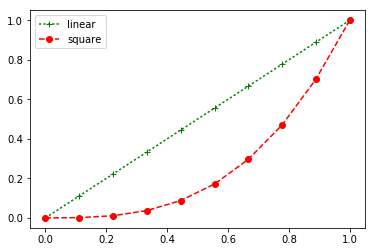

In [13]:
x = np.linspace(0,1,10)
linear = x
square = x**3
plt.plot(x, linear, 'g:+', x, square, 'r--o')
plt.legend(('linear', 'square'), loc='upper left');

# Feature Analysis
**Feature** is a distinctive property or aspect of something. Features analysis is the first step in extracting knowledge from signals, such as pattern recognition or semantic (meaningful) processing of data. 

There are several types of features or ways of finding them:  

* Change in representation of data.  
     This is often done using transform techniques
* Summarization of data.  
     This is often done using statistics
* Selection or factorization of relevant data.   
    Usually done by combining statistical considerations to separate data into groups or remove noise
    
The first technique usually keeps the complete information and the data can be reproduced back from the features. The two later method are "lossy" in the sense that the original data can not be fully recovered from the features. Nonetheless, these features might be more "informative" then the original samples since they remove noise or reveal important structure that might be otherwise hidden.
    
Let us start with an audio example:

## Librosa audio feature analysis

Can be obtained from https://github.com/librosa/librosa

In [14]:
import librosa
import os

   We will use Magnitude STFT as Features to describe the audio file
   Features uses parameters to define the time and frequency detail that we want to extract from the audio file.
   To find more about Features use the help function

In [15]:
librosa.feature?

Example 1: Using narrow band viewing that shows details of the individual harmonics:
   nfft = 16384, wfft = 8192, nhop = 2205 (20Hz frame rate)


In [19]:
os.getcwd()

'/Users/sdubnov/Documents/Courses/Mus 206 Deep & Shallow/Notebooks/Publish'

In [23]:
filename = './audio_files/ohm_scale.wav'
y, sr = librosa.load(filename) # load audio file into waveform 
F = librosa.stft(y, n_fft=1024*6, win_length=1024*4, hop_length=1024*2)
# F = Features(filename, {'feature':'stft', 'nfft':16384, 'wfft':8192, 'nhop':2205} )

In [24]:
print F.shape

(3073, 112)


By now those who are familiar with Matlab might realize that there are a lot of similarities between using python with sceintific packages (Numpy, Scipy) and Matlab. For a more complete comparison see
https://sites.google.com/site/pythonforscientists/python-vs-matlab

So if you have experience with scientific programming using Matlab, it is realtively easy to learn python by looking up the parallel commands. See 
http://wiki.scipy.org/NumPy_for_Matlab_Users

Also there are many "cheat sheets" on the web that show parallel commands, like this one
http://mathesaurus.sourceforge.net/matlab-numpy.html

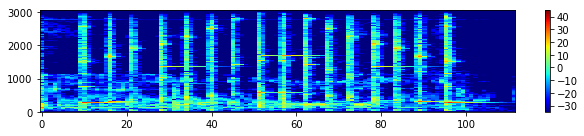

In [33]:
eps = 1e-3
plt.figure(figsize=(9,2))
plt.imshow(librosa.amplitude_to_db(np.abs(F)), aspect='auto', origin='bottom', cmap='jet')
plt.colorbar()
plt.tight_layout()

Or use the Librosa built-in function for plotting features

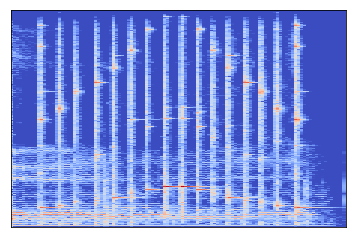

In [34]:
import librosa.display
librosa.display.specshow(librosa.amplitude_to_db(np.abs(F)))

Lets repeat this whole process by directly reading the sound file into python (Features used a file name) and doing FFT. 

In [35]:
print sr

22050


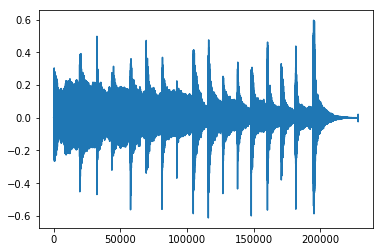

In [36]:
plt.plot(y)

### How about reading images and extracting their features?
In the following we will take an indepth look into audio and image features: DCT for image, MFCC for audio.


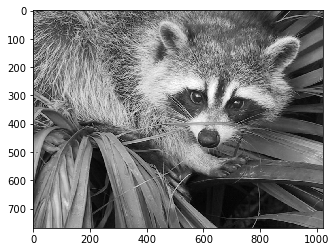

In [40]:
from scipy.misc import face
# from matplotlib.pyplot import imshow
# from matplotlib.pyplot import cm

lenabw = face()/float(face().max())
lenabw = np.sum(lenabw,axis = 2)

plt.imshow(lenabw, cmap='gray')

In [41]:
face().max(), face().dtype

(255, dtype('uint8'))

One of the popular measures of image is a histogram. Here we plot the grayscale distribution

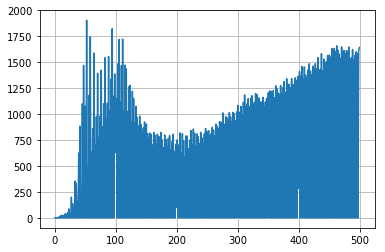

In [42]:
from scipy.ndimage import measurements
h = measurements.histogram(lenabw, 0, 1, 500)
plt.plot(h)
plt.grid()

What is a histogram? Let's do a simple example from the help file:

array([13,  0,  2,  1,  0,  1,  1,  2,  0,  0])

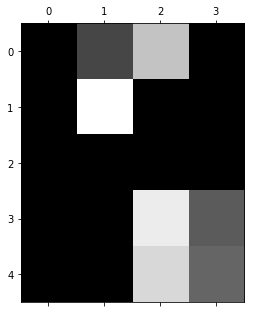

In [43]:
a = np.array([[ 0.    ,  0.2146,  0.5962,  0.    ],
              [ 0.    ,  0.7778,  0.    ,  0.    ],
              [ 0.    ,  0.    ,  0.    ,  0.    ],
              [ 0.    ,  0.    ,  0.7181,  0.2787],
              [ 0.    ,  0.    ,  0.6573,  0.3094]])
plt.matshow(a, cmap='gray')
measurements.histogram(a, 0, 1, 10)

### Scikits image

Provides extended image processing capabilities

http://scikit-image.org/docs/dev/api/skimage.html


##Image Transform Features and Compression  
There are many possible image features. We will consider here a common transform for images called DCT that is the parallel to using FFT for audio. DCT is used in JPEG to represent an image with only few elements.


(768, 1024)


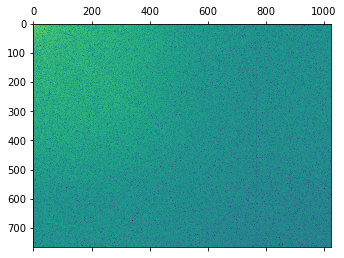

In [44]:
from scipy.fftpack import dct, idct

lenaDCT = dct(dct(lenabw, axis=0),axis=1)

print np.shape(lenaDCT)

plt.matshow(np.log(abs(lenaDCT)))
#matshow(abs(lenaDCT))

Using only 0.000509 of pixels


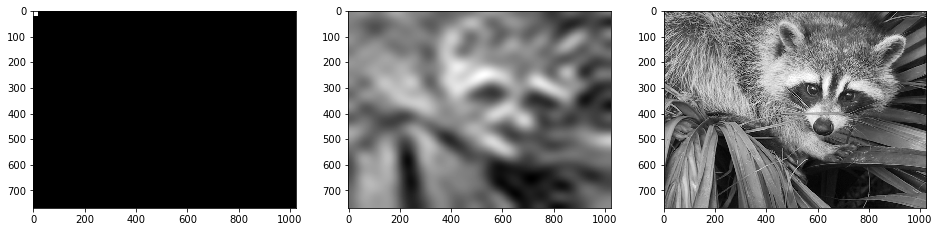

In [47]:
lenaMask = np.zeros(np.shape(lenaDCT))
maxFreq=20
lenaMask[:maxFreq,:maxFreq]=1

L1 = lenaDCT * lenaMask
lenaOut = idct(idct(L1,axis=0),axis=1)


plt.figure(figsize=(16,4))
plt.subplot(131)
plt.imshow(lenaMask,cmap='gray')
plt.subplot(132)

plt.imshow(lenaOut,cmap='gray')
plt.subplot(133)
plt.imshow(lenabw,cmap='gray')

from __future__ import division
print 'Using only %f of pixels' % (np.sum(lenaMask)/np.size(lenaMask))

Let's see now how it is done for sounds.

### STFT Code

Read sound file and perform stft. This is a matrix of complex numbers, so we take the absolute value and get rid of the mirror frequencies. 

In [48]:
# import scipy
# def stft(input_data, sample_rate, window_size, hop_size):
#     window = scipy.hamming(window_size)
#     output = scipy.array([scipy.fft(window*input_data[i:i+window_size]) 
#                          for i in range(0, len(input_data)-window_size, hop_size)])
#     return output

# def istft(input_data, sample_rate, window_size, hop_size, total_time):
#     output = scipy.zeros(total_time*sample_rate)
#     for n,i in enumerate(range(0, len(output)-window_size, hop_size)):
#         output[i:i+window_size] += scipy.real(scipy.ifft(input_data[n]))
#     return output

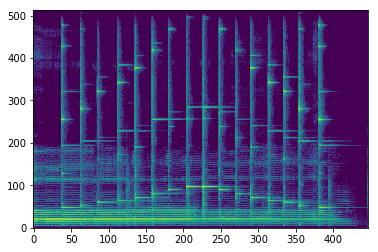

In [49]:
y, sr = librosa.load('audio_files/ohm_scale.wav')
X = np.abs(librosa.stft(y, n_fft=1024, hop_length=512))
plt.imshow(librosa.amplitude_to_db(X), origin='bottom', aspect='auto')

# Audio Filtering

* Read in audio
* Apply STFT (Window and FFT)
* Remove a range of frequencies we do not want
* Apply Inverse STFT (to resynthesize)
* Write new audio

In [50]:
def low_pass_filter(max_freq, window_size, sample_rate):
    fft_bin_width = sample_rate / window_size
    max_freq_bin = int(max_freq / fft_bin_width)
    filter_block = np.ones(window_size//2 + 1)
    filter_block[max_freq_bin:] = 0
    return filter_block

def high_pass_filter(min_freq, window_size, sample_rate):
    return np.ones(window_size//2 + 1) - low_pass_filter(min_freq, window_size, sample_rate)

def filter_audio(y, sample_rate, filter_window, window_size=256):
    # Setting parameters
    hop_size = window_size // 2
    
    # Do actual filtering
    filter_window = filter_window.reshape((-1,1))
    stft_output = librosa.stft(y, n_fft=window_size, hop_length=hop_size)
    filtered_result = filter_window*stft_output
    resynth = librosa.istft(filtered_result, hop_length=hop_size)
    
    return resynth

Perform filtering

In [51]:
window_size = 256

# Create filter window
filter_window = high_pass_filter(3000, window_size, sr)

y = y/(max(y))
# Run filter
resynth = filter_audio(y, sr, filter_window, window_size)

# Output
librosa.output.write_wav('out.wav', resynth, sr)

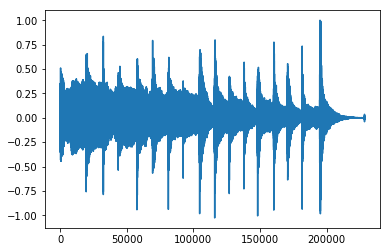

In [52]:
plt.plot(y)

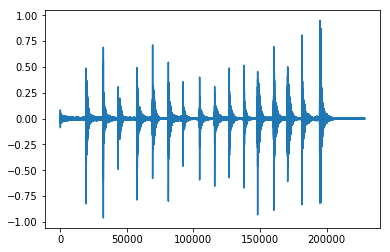

In [53]:
plt.plot(resynth)

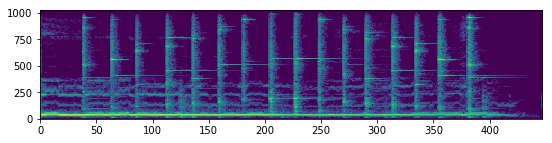

In [54]:
plt.figure(figsize=(9,2))
plt.imshow(librosa.amplitude_to_db(np.abs(librosa.stft(y))), aspect='auto', origin='bottom')

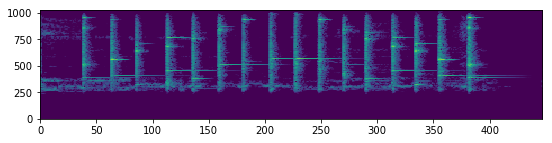

In [55]:
plt.figure(figsize=(9,2))
plt.imshow(librosa.amplitude_to_db(np.abs(librosa.stft(resynth))), aspect='auto', origin='bottom')

In [56]:
import IPython.display as ipydisplay

In [57]:
# Audio before
ipydisplay.Audio(data=y, rate=sr)

In [58]:
# Audio after
ipydisplay.Audio(data=resynth, rate=sr)

Homework:

* Write an image compression function and test it on different images. Describte your code and results. What happens if you retain high DFT coefficients and remove the low ones?
* Create a convenient display function that can change the window_size parameter and can zoom in the display on different frequency ranges.
* Audio filtering effective applies masking to the fft matrix. Try changing the window_size parameter and explain what you see and hear.


Some fun ideas: read an image file into 1D array and play as a sound file..